In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
import pandas as pd
import os


DATASET_PATH = "./plant-pathology-2020-fgvc7/"
IMAGE_PATH = os.path.join(DATASET_PATH, "images/")


train_df = pd.read_csv(os.path.join(DATASET_PATH, "train.csv"))


print(f"Total images in dataset: {len(train_df)}")
print(train_df.head())


Total images in dataset: 1821
  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0


In [ ]:
import cv2
import numpy as np


IMG_SIZE = 128  


def load_and_preprocess_image(image_id):
    path = os.path.join(IMAGE_PATH, image_id + ".jpg")  
    if not os.path.exists(path):  
        print(f"Warning: {path} not found!") 
        return np.zeros((IMG_SIZE, IMG_SIZE, 3)) 
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0 
    return img


X = np.array([load_and_preprocess_image(img_id) for img_id in train_df["image_id"]])

print(f"Successfully loaded {len(X)} images")


Successfully loaded 1821 images


In [ ]:
from tensorflow.keras.utils import to_categorical


labels = ['healthy', 'multiple_diseases', 'rust', 'scab']
train_df[labels] = train_df[labels].astype(int)


train_df['label_index'] = train_df[labels].idxmax(axis=1).astype('category').cat.codes


y = to_categorical(train_df['label_index'], num_classes=4)

print("Labels converted to one-hot encoding")


Labels converted to one-hot encoding


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training images: {len(X_train)}, Validation images: {len(X_val)}")
""

Training images: 1456, Validation images: 365


''

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax') 
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model


model = create_cnn_model()


In [ ]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_acc:.4f}")


Epoch 1/10
46/46 [==============================] - 15s 318ms/step - loss: 1.2787 - accuracy: 0.3310 - val_loss: 1.2132 - val_accuracy: 0.3918
Epoch 2/10
46/46 [==============================] - 15s 322ms/step - loss: 1.2015 - accuracy: 0.4196 - val_loss: 1.1529 - val_accuracy: 0.4932
Epoch 3/10
46/46 [==============================] - 29s 633ms/step - loss: 1.1541 - accuracy: 0.4698 - val_loss: 1.1425 - val_accuracy: 0.5041
Epoch 4/10
46/46 [==============================] - 15s 332ms/step - loss: 1.1278 - accuracy: 0.4842 - val_loss: 1.1132 - val_accuracy: 0.5397
Epoch 5/10
46/46 [==============================] - 31s 678ms/step - loss: 1.0731 - accuracy: 0.5302 - val_loss: 1.0987 - val_accuracy: 0.5479
Epoch 6/10
46/46 [==============================] - 21s 452ms/step - loss: 1.0408 - accuracy: 0.5632 - val_loss: 1.0734 - val_accuracy: 0.5260
Epoch 7/10
46/46 [==============================] - 35s 772ms/step - loss: 0.9997 - accuracy: 0.5865 - val_loss: 1.0641 - val_accuracy: 0.5425

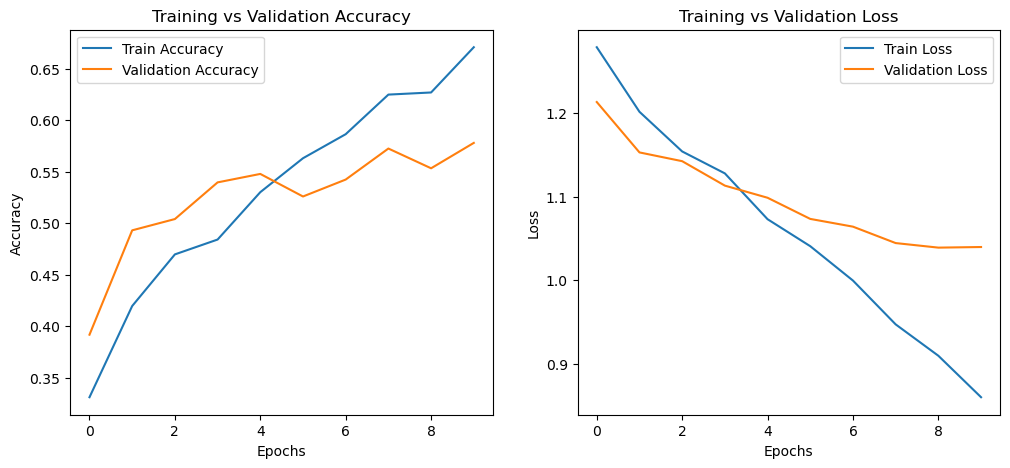

In [ ]:
 import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()
